In [1]:
import verse

/home/gokul/Desktop/verse-research/verse_research_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from typing import Tuple, List

import numpy as np
from scipy.integrate import ode
import torch

# from tutorial_utils import drone_params
from verse import BaseAgent
from verse import LaneMap
from verse.map.lane_map_3d import LaneMap_3d
from verse.analysis.utils import wrap_to_pi
from verse.analysis.analysis_tree import TraceType

from numba import njit

In [3]:

def make_random_input(seed, intruder_can_turn=True, num_inputs=100):
    """make a random input for the system"""

    np.random.seed(seed) # deterministic random numbers

    # state vector is: x, y, theta, x2, y2, theta2, time
    init_vec = np.zeros(7)
    init_vec[2] = np.pi / 2 # ownship moving up initially

    radius = 10000 + np.random.random() * 55000 # [10000, 65000]
    angle = np.random.random() * 2 * np.pi
    int_x = radius * np.cos(angle)
    int_y = radius * np.sin(angle)
    int_heading = np.random.random() * 2 * np.pi

    init_vec[3] = int_x
    init_vec[4] = int_y
    init_vec[5] = int_heading

    # intruder commands for every control period (0 to 4)
    if intruder_can_turn:
        cmd_list = []

        for _ in range(num_inputs):
            cmd_list.append(np.random.randint(5))
    else:
        cmd_list = [0] * num_inputs

    # generate random valid velocities
    #init_velo = [np.random.randint(100, 1146),
    #             np.random.randint(60, 1146)]
    init_velo = [np.random.randint(100, 1200),
                 np.random.randint(0, 1200)]

    return init_vec, cmd_list, init_velo


In [4]:
from dl_acas import CraftMode


init_vec, cmd_list, init_velo = make_random_input(seed=671, intruder_can_turn=False)
x1 = init_vec[0]
y1 = init_vec[1]
theta1 = init_vec[2]
x2 = init_vec[3]
y2 = init_vec[4]
theta2 = init_vec[5]
random_attr = init_vec[6]
ego_velo = init_velo[0]
int_velo = init_velo[1]
ego_mode = CraftMode.Coc
int_mode = CraftMode.Coc


In [5]:
import numpy as np
decisions_ego = np.load('commands_671.npy')
decisions_ego = decisions_ego.tolist()
# print(decisions)

In [6]:
from aircraft_agent import AircraftAgent



In [7]:
from verse.scenario import Scenario
from verse.scenario import ScenarioConfig

from tutorial_map import M4

scenario = Scenario()
# scenario.set_map(M4())

In [8]:
ac1 = AircraftAgent("aircraft1", file_name="dl_acas.py", initial_mode=ego_mode, velo=ego_velo)

 
ac1.set_initial(
    [[0.0, 0.0, 1.5707963267948966, 0.0], [0.0, 0.0, 1.5707963267948966, 0.0]], ([CraftMode.Coc]),
)

decisions_int = [0]*96
ac2 = AircraftAgent("aircraft2", file_name="dl_acas.py", initial_mode=int_mode, velo=int_velo)

ac2.set_initial(
    [[-38430.170388824416, 33296.38722330337, 5.772033585630306, 0.0], [-38430.170388824416, 33296.38722330337, 5.772033585630306, 0.0]], ([CraftMode.Coc]),
)

scenario.add_agent(ac1)
scenario.add_agent(ac2)

In [9]:
from tutorial_sensor import DefaultSensor

scenario.set_sensor(DefaultSensor())

In [10]:
traces_simu = scenario.simulate(19.2, 0.2)
traces_veri = scenario.verify(19.2, 0.2)

2023-11-09 11:53:02,959	INFO worker.py:1625 -- Started a local Ray instance.


(simulate_one pid=506746) node 0 start: 0
(simulate_one pid=506746) 0
(simulate_one pid=506746) 0
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simulate_one pid=506746) 2
(simul

In [17]:
from verse.plotter.plotter3D import *
import pyvista as pv
import warnings

warnings.filterwarnings("ignore")

from verse.plotter.plotter2D import *
import plotly.graph_objects as go

fig = go.Figure()
fig = reachtube_tree(traces_veri, None, fig, 1, 2)
fig.show()

# pv.set_jupyter_backend(None)
# fig = pv.Plotter()
# # fig = plot3dMap(M4(), ax=fig)
# fig = plot3dReachtube(traces_veri, "aircraft1", 1, 2, 3, color="r", ax=fig)
# fig = plot3dReachtube(traces_veri, "aircraft2", 1, 2, 3, color="b", ax=fig)
# fig.set_background("#e0e0e0")
# fig.show()

ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot 

ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot triangulate; no input points
ERROR:root:<<Cannot 

: 

In [12]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d.art3d import Poly3DCollection
# import numpy as np
# import polytope as pc

# # ... (other function definitions)

# def plot3dReachtubeMatplotlib(traces, agent_id, x_dim, y_dim, z_dim, ax, color='red', alpha=0.5):
#     for node in traces:  # Assuming 'traces' is an iterable of nodes
#         trace = node.trace[agent_id]  # Access the agent's trace
#         for i in range(0, len(trace), 2):
#             lb = trace[i]
#             ub = trace[i + 1]
#             box = np.array([[lb[x_dim], lb[y_dim], lb[z_dim]], [ub[x_dim], ub[y_dim], ub[z_dim]]]).T
#             poly = pc.box2poly(box)
#             vertices = pc.extreme(poly)
#             hull = pc.qhull.ConvexHull(vertices)
#             for simplex in hull.simplices:
#                 simplex = np.append(simplex, simplex[0])  # Close the polytope
#                 ax.add_collection3d(Poly3DCollection([vertices[simplex]], facecolors=color, edgecolors='k', alpha=alpha))
#     return ax

# # Usage
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.set_box_aspect([1,1,1])  # Set equal aspect ratio

# # Call the function with your data
# # You need to replace 'traces_veri' with the actual data structure that contains your trajectories.
# ax = plot3dReachtubeMatplotlib(traces_veri, "aircraft1", 1, 2, 3, ax=ax, color='red', alpha=0.5)
# ax = plot3dReachtubeMatplotlib(traces_veri, "aircraft2", 1, 2, 3, ax=ax, color='blue', alpha=0.5)

# # Set the background and show the plot
# ax.set_facecolor('#e0e0e0')
# plt.show()


In [13]:
from scipy.linalg import expm
import math



def step_state(state7, v, time_elapse_mat, dt):
    """perform one time step with the given commands"""
    state8_vec = state4_to_state5(state7, v)
   

    s = time_elapse_mat @ state8_vec
    # extract observation (like theta) from state
    new_time = state7[-1] + dt
    theta1 = math.atan2(s[3], s[2])
    rv = np.array([s[0], s[1], theta1, new_time])

    return rv
def state4_to_state5(state7, v):
    """compute x,y, vx, vy from state7"""

    assert len(state7) == 4

    x1 = state7[0]
    y1 = state7[1]
    vx1 = math.cos(state7[2]) * v
    vy1 = math.sin(state7[2]) * v

    return np.array([x1, y1, vx1, vy1])

'Lru Cache.'
def get_time_elapse_mat(command, dt):
    '''get the matrix exponential for the given command

    state: x, y, vx, vy
    '''

    y_list = [0.0, 1.5, -1.5, 3.0, -3.0]
    y1 = y_list[command]
    # y2 = y_list[command2]

    dtheta1 = (y1 / 180 * np.pi)
    # dtheta2 = (y2 / 180 * np.pi)
    a_mat = np.array([
        [0, 0, 1, 0], # x' = vx
        [0, 0, 0, 1], # y' = vy
        [0, 0, 0, -dtheta1], # vx' = -vy * dtheta1
        [0, 0, dtheta1, 0], # vy' = vx * dtheta1
        ], dtype=float)
    return expm(a_mat * dt)


def init_time_elapse_mats(dt):
    """get value of time_elapse_mats array"""

    rv = []
    rv.append([]) 
    for cmd in range(5):
           

        mat = get_time_elapse_mat(cmd, dt)
        rv[-1].append(mat)

    return rv



0
0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
0
4
0
2
2
2
2
2
2
0
0


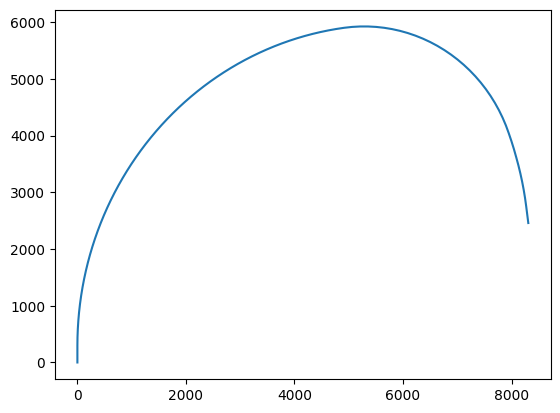

In [14]:
import matplotlib.pyplot as plt

time_bound = 19.2
time_step = 0.2
time_bound = float(time_bound)
num_points = int(np.ceil(time_bound / time_step))

init_vec, cmd_list, init_velo = make_random_input(seed=671, intruder_can_turn=False)
x1 = init_vec[0]
y1 = init_vec[1]
theta1 = init_vec[2]
x2 = init_vec[3]
y2 = init_vec[4]
theta2 = init_vec[5]
random_attr = init_vec[6]
ego_velo = init_velo[0]
int_velo = init_velo[1]
init=[x1, y1, theta1, random_attr]


trace = np.zeros((num_points + 1, 1 + len(init)))
trace[1:, 0] = [round(i * time_step, 10) for i in range(num_points)]
trace[0, 1:] = init
vec=init
# print(vec)
dt_acas=1.0
time_elapse_mats = init_time_elapse_mats(dt_acas)

cmds=np.load('commands_671.npy')
cmds=cmds.tolist()

x_coord=[vec[0]]
y_coord=[vec[1]]

for i in range(num_points-2):
    # print(mode)
    # cmd = self.action_handler(mode, init, lane_map=None)

    cmd=cmds[int(vec[3])]
    print(cmd)
    time_elapse_mat = time_elapse_mats[0][cmd] #get_time_elapse_mat(self.command, State.dt, intruder_cmd)
    vec = step_state(vec, ego_velo, time_elapse_mat, dt_acas)
    x_coord.append(vec[0])
    y_coord.append(vec[1])  
    # print(vec[1])

    init = vec.flatten()


plt.plot(x_coord, y_coord)

In [15]:
print(x1, y1, theta1, x2, y2, theta2, random_attr, ego_velo, int_velo)

0.0 0.0 1.5707963267948966 -38430.170388824416 33296.38722330337 5.772033585630306 0.0 148 579
